## grade 1~4 기준
- 항목: month, obp, slg, ba, era, whip + grade

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [52]:
# 구단별 No

# 1. kt wiz
# 2. 두산 베어스
# 3. 삼성 라이온즈
# 4. LG 트윈스
# 5. 키움히어로즈
# 6. SSG 랜더스
# 7. NC 다이노스
# 8. 롯데 자이언츠
# 9. 기아 타이거즈
# 10. 한화 이글스

In [53]:
bb = pd.read_csv("./Raw_First_Value.csv") 
bb

,team,year,month,pov,obp,slg,ba,era,whip
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60
...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40


In [54]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    534 non-null    int64  
 1   year    534 non-null    int64  
 2   month   534 non-null    int64  
 3   pov     534 non-null    float64
 4   obp     534 non-null    float64
 5   slg     534 non-null    float64
 6   ba      534 non-null    float64
 7   era     534 non-null    float64
 8   whip    534 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 37.7 KB


In [55]:
# 승률별 등급 차등 분류

def get_grade_1(pov):
    if pov>=0.60:
        grade = 4
    elif pov>=0.50:
        grade = 3
    elif pov>=0.40:
        grade = 2
    else:
        grade = 1
    return grade

## grade 1~4 기준 

In [56]:
# grade 1~4 기준 (Grade 4 = 0.60 이상 , Grade 3 = 0.50 이상 0.60 미만, Grade 2 = 0.40 이상 0.50 미만, Grade 1 = 0.40 미만)
bb['grade'] = bb['pov'].apply(lambda pov: get_grade_1(pov))
bb

,team,year,month,pov,obp,slg,ba,era,whip,grade
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92,1
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79,1
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58,1
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68,2
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60,2
...,...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46,3
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38,1
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47,1
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40,1


### OLS

#### OLS 1. 상수 X

In [57]:
# y=grade

import statsmodels.api as sm

X = bb[['month', 'obp', 'slg', 'ba', 'era', 'whip']]
y = bb['grade']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  grade   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1115.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   4.81e-296
Time:                        23:31:42   Log-Likelihood:                         -606.32
No. Observations:                 534   AIC:                                      1225.
Df Residuals:                     528   BIC:                                      1250.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month          0.0006      0.015      0.039      0.969      -0.030       0.031
obp            9.7901      1.896      5.163      0.000       6.065      13.515
slg            7.5112      0.969      7.750      0.000       5.607       9.415
ba            -3.9094      2.591     -1.509      0.132      -8.998       1.180
era           -0.5744      0.046    -12.408      0.000      -0.665      -0.483
whip          -0.1242      0.245     -0.506      0.613      -0.606       0.358
==============================================================================
Omnibus:                        6.748   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.015
Skew:                          -0.208   Prob(JB):                       0.0300
Kurtosis:                       3.377   Cond. No.                         787.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# y=pov

X = bb[['month','obp', 'slg', 'ba', 'era', 'whip']]
y = bb['pov']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pov   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1582.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                        0.00
Time:                        23:31:43   Log-Likelihood:                          368.24
No. Observations:                 534   AIC:                                     -724.5
Df Residuals:                     528   BIC:                                     -698.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month          0.0027      0.002      1.094      0.274      -0.002       0.008
obp            2.3747      0.306      7.767      0.000       1.774       2.975
slg            1.2894      0.156      8.252      0.000       0.982       1.596
ba            -1.6190      0.418     -3.877      0.000      -2.439      -0.799
era           -0.0908      0.007    -12.162      0.000      -0.105      -0.076
whip          -0.0052      0.040     -0.132      0.895      -0.083       0.072
==============================================================================
Omnibus:                       92.687   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.822
Skew:                          -0.363   Prob(JB):                    6.31e-214
Kurtosis:                       9.603   Cond. No.                         787.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### OLS 2. 상수 O

In [59]:
# y=grade

feature_names= ['month','obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(bb, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(bb, columns=["grade"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     91.92
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.03e-78
Time:                        23:31:44   Log-Likelihood:                -605.98
No. Observations:                 534   AIC:                             1226.
Df Residuals:                     527   BIC:                             1256.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4134      0.500      0.827      0.4

In [60]:
# y=pov

feature_names= ['month','obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(bb, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(bb, columns=["pov"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    pov   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     90.05
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.59e-77
Time:                        23:31:45   Log-Likelihood:                 370.39
No. Observations:                 534   AIC:                            -726.8
Df Residuals:                     527   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1658      0.080      2.065      0.0

#### OLS 3. 비교
* 상수 없음
  - grade : R-Squared : 0.927 / AIC : 1225.
  - pov : R-Squared : 0.947 /AIC : -724.5
* 상수 있음
  - grade : R-Squared : 0.511 / AIC : 1226.
  - pov : R-Squared : 0.506 /AIC : -726.8

### Decision Tree

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### Test Size 1. 0.2

In [62]:
X=bb[['month','obp', 'slg', 'ba', 'era','whip']]
y=bb['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

cc = DecisionTreeClassifier(max_depth=7, random_state=13)
cc.fit(X_train, y_train)

y_pred_tr = cc.predict(X_train)
y_pred_test = cc.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7822014051522248
Test Acc :  0.5327102803738317


#### Test Size 2. 0.3

In [63]:
X=bb[['month','obp', 'slg', 'ba', 'era','whip']]
y=bb['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

cc = DecisionTreeClassifier(max_depth=7, random_state=13)
cc.fit(X_train, y_train)

y_pred_tr = cc.predict(X_train)
y_pred_test = cc.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.8123324396782842
Test Acc :  0.5403726708074534


#### Test size 3. 비교 (max_depth=7)
* 0.2 
  - Train Acc :  0.7822014051522248
  - Test Acc :  0.5327102803738317
* 0.3
  - Train Acc :  0.8123324396782842
  - Test Acc :  0.5403726708074534

#### Best max_depth

In [64]:
from sklearn.model_selection import GridSearchCV
import pprint

params={'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
baseball=DecisionTreeClassifier(random_state=13)

gridsearch=GridSearchCV(estimator=baseball, param_grid=params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]})

In [65]:
pp=pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_) 

{   'mean_fit_time': array([0.00819745, 0.03659186, 0.01539392, 0.02219248, 0.03298721,
       0.03978596, 0.0145936 , 0.01679544, 0.01870718, 0.01739302,
       0.01779351, 0.01759257, 0.01419244, 0.01279564, 0.01339531]),
    'mean_score_time': array([0.00419827, 0.01019416, 0.01159697, 0.01219754, 0.01859651,
       0.00559888, 0.0095973 , 0.00859771, 0.01039877, 0.01119699,
       0.00559878, 0.00639968, 0.00679874, 0.00339971, 0.00639701]),
    'mean_test_score': array([0.35009698, 0.38950802, 0.43627226, 0.45688591, 0.43815905,
       0.46247575, 0.48310704, 0.4586669 , 0.45127843, 0.4661788 ,
       0.43995768, 0.46247575, 0.45501675, 0.45681538, 0.45681538]),
    'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 1},


In [66]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=7, random_state=13)

* best_estimator: max_depth=7로 확인

#### Score

In [67]:
# 분류기 성능 return 하는 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval_m(y_test, pred):
    acc=accuracy_score(y_test, pred)
    pre=precision_score(y_test, pred, average='micro')
    re=recall_score(y_test, pred, average='micro')
    f1=f1_score(y_test, pred, average='micro')
    pred_proba=cc.predict_proba(X_test)
    auc=roc_auc_score(y_test, pred_proba, multi_class='ovr')
    
    return acc, pre, re, f1, auc

In [68]:
# 분류기 성능 return 하는 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval_w(y_test, pred):
    acc=accuracy_score(y_test, pred)
    pre=precision_score(y_test, pred, average='weighted')
    re=recall_score(y_test, pred, average='weighted')
    f1=f1_score(y_test, pred, average='weighted')
    pred_proba=cc.predict_proba(X_test)
    auc=roc_auc_score(y_test, pred_proba, multi_class='ovr')
    
    return acc, pre, re, f1, auc

In [69]:
from sklearn.metrics import confusion_matrix

def print_clf_eval_m(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc, pre, re, f1, auc = get_clf_eval_m(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=========')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f},  F1_1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [70]:
from sklearn.metrics import confusion_matrix

def print_clf_eval_w(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc, pre, re, f1, auc = get_clf_eval_w(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=========')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f},  F1_1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [71]:
print('average=micro:'), print_clf_eval_m(y_test, y_pred_test),
print('=========================================='),
print('average=weighted:'), print_clf_eval_w(y_test, y_pred_test)

average=micro:
=> confusion matrix
[[19 11  4  1]
 [11 17  9  1]
 [ 7  5 34  4]
 [ 1  4 16 17]]
Accuracy: 0.5404, Precision: 0.5404
Recall: 0.5404,  F1_1: 0.5404, AUC:0.7234
average=weighted:
=> confusion matrix
[[19 11  4  1]
 [11 17  9  1]
 [ 7  5 34  4]
 [ 1  4 16 17]]
Accuracy: 0.5404, Precision: 0.5592
Recall: 0.5404,  F1_1: 0.5386, AUC:0.7234


(None, None)

#### Classification report

c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


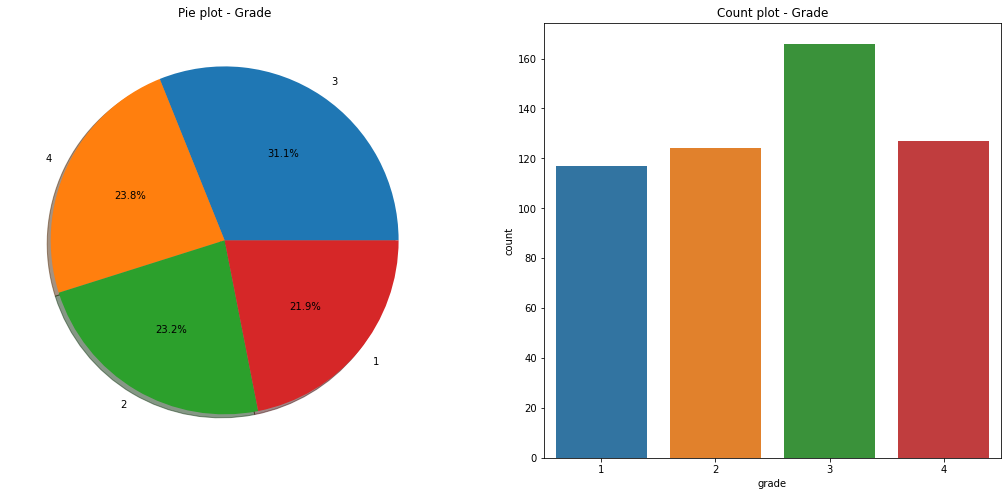

In [72]:
# 등급별로 얼마나 있는지 비율 확인

f, ax = plt.subplots(1, 2, figsize=(18, 8))

bb['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Grade')
ax[0].set_ylabel('')
sns.countplot('grade', data=bb, ax=ax[1])
ax[1].set_title('Count plot - Grade')

plt.show();

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.50      0.54      0.52        35
           2       0.46      0.45      0.45        38
           3       0.54      0.68      0.60        50
           4       0.74      0.45      0.56        38

    accuracy                           0.54       161
   macro avg       0.56      0.53      0.53       161
weighted avg       0.56      0.54      0.54       161



In [74]:
# 21.9 : 23.2 : 31.1 : 23.8
print(35/161), print(38/161), print(50/161), print(38/161)

0.21739130434782608
0.2360248447204969
0.3105590062111801
0.2360248447204969


(None, None, None, None)

* 비교: 실제 비율(21.9 : 23.2 : 31.1 : 23.8) 과 유사함

### 2022년 6월 13일 기준 data와 비교

In [75]:
month6=pd.read_csv('2022yearcumul01.csv')
month6.sort_values(by=['POV'], ascending=False)

,team,OBP,SLG,BA,ERA,WHIP,POV,이름
3,6,0.330,0.370,0.249,3.56,1.21,0.661,ssg
2,5,0.326,0.365,0.246,3.49,1.26,0.600,키움
1,4,0.340,0.392,0.264,3.78,1.36,0.567,lg
0,9,0.350,0.409,0.269,4.03,1.34,0.542,기아
4,2,0.331,0.357,0.256,4.12,1.42,0.483,두산
7,3,0.321,0.365,0.260,3.86,1.39,0.483,삼성
5,1,0.326,0.352,0.247,3.58,1.24,0.475,kt
9,8,0.313,0.366,0.254,4.03,1.36,0.448,롯데
6,7,0.320,0.363,0.248,3.85,1.36,0.383,nc
8,10,0.317,0.355,0.242,5.30,1.53,0.361,한화


In [76]:
ssg=np.array([[6, 0.330,	0.370,	0.249,	3.56,	1.21]])
kium=np.array([[6, 0.326,	0.365,	0.246,	3.49,	1.26]])
lg=np.array([[6, 0.340,	0.392,	0.264,	3.78,	1.36]]) 
kia=np.array([[6, 0.350,	0.409,	0.269,	4.03,	1.34]]) 
dusan=np.array([[6, 0.331,	0.357,	0.256,	4.12,	1.42]])
samsung=np.array([[6, 0.321,	0.365,	0.260,	3.86,	1.39]])
kt=np.array([[6, 0.326,	0.352,	0.247,	3.58,	1.24]])
lotte=np.array([[6, 0.313,	0.366,	0.254,	4.03,	1.36]])
nc=np.array([[6, 0.320,	0.363,	0.248,	3.85,	1.36]])
hanhwa=np.array([[6, 0.317,	0.355,	0.242,	5.30,	1.53]])

#### 예측 값

In [77]:
print('1. ssg : ', cc.predict(ssg)),
print('2. kium :', cc.predict(kium)),
print('3. lg : ', cc.predict(lg)),
print('4. kia : ', cc.predict(kia)), 
print('5. dusan : ', cc.predict(dusan)),
print('6. samsung : ', cc.predict(samsung)), 
print('7. kt :', cc.predict(kt)), 
print('8. lotte: ', cc.predict(lotte)), 
print('9. nc :', cc.predict(nc)), 
print('10. hanhwa :', cc.predict(hanhwa))

1. ssg :  [3]
2. kium : [3]
3. lg :  [3]
4. kia :  [3]
5. dusan :  [3]
6. samsung :  [3]
7. kt : [3]
8. lotte:  [2]
9. nc : [3]
10. hanhwa : [1]


c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  

In [78]:
cc.predict_proba(X_test)

array([[0.5       , 0.        , 0.5       , 0.        ],
       [0.8       , 0.        , 0.2       , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.8       , 0.        , 0.2       , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.04      , 0.24      , 0.6       , 0.12      ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.04      , 0.24      , 0.6       , 0.12      ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.11111111, 0.88888889, 0.        , 0.        ],
       [0.        , 0.90909091, 0.        , 0.09090909],
       [1.        , 0.        ,

#### 예측 비율

In [79]:
print('1. ssg : ', cc.predict_proba(ssg)),
print('2. kium :', cc.predict_proba(kium)),
print('3. lg : ', cc.predict_proba(lg)),
print('4. kia : ', cc.predict_proba(kia)), 
print('5. dusan : ', cc.predict_proba(dusan)),
print('6. samsung : ', cc.predict_proba(samsung)), 
print('7. kt :', cc.predict_proba(kt)), 
print('8. lotte: ', cc.predict_proba(lotte)), 
print('9. nc :', cc.predict_proba(nc)), 
print('10. hanhwa :', cc.predict_proba(hanhwa))

1. ssg :  [[0.08 0.28 0.6  0.04]]
2. kium : [[0.08 0.28 0.6  0.04]]
3. lg :  [[0.0625 0.     0.875  0.0625]]
4. kia :  [[0.         0.         0.61111111 0.38888889]]
5. dusan :  [[0.08 0.28 0.6  0.04]]
6. samsung :  [[0.08 0.28 0.6  0.04]]
7. kt : [[0.08 0.28 0.6  0.04]]
8. lotte:  [[0.25 0.75 0.   0.  ]]
9. nc : [[0.08 0.28 0.6  0.04]]
10. hanhwa : [[1. 0. 0. 0.]]


c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  

### 다른 model 확인

In [80]:
# 모델+data 있으면 성능 출력하는 함수
def get_result_m(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    return get_clf_eval_m(y_test, pred)

In [81]:
# 모델+data 있으면 성능 출력하는 함수
def get_result_w(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    return get_clf_eval_w(y_test, pred)

In [82]:
# 다수의 모델의 성능 출력하는 함수
def get_result_pd_m(models, model_names, X_train, y_train, X_test, y_test):
    col_names=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp=[]
    
    for model in models:
        tmp.append(get_result_m(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [83]:
# 다수의 모델의 성능 출력하는 함수
def get_result_pd_w(models, model_names, X_train, y_train, X_test, y_test):
    col_names=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp=[]
    
    for model in models:
        tmp.append(get_result_w(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression(random_state=13, solver='liblinear')
dt_clf=DecisionTreeClassifier(random_state=13, max_depth=7)
rf_clf=RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

In [85]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names=['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']
 
start_time=time.time()
results=get_result_pd_m(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time), print(results)

Fit time :  8.67140531539917
              accuracy  precision    recall        f1   roc_auc
LogisticReg   0.472050   0.472050  0.472050  0.472050  0.723394
DecisionTree  0.540373   0.540373  0.540373  0.540373  0.723394
RandomForest  0.552795   0.552795  0.552795  0.552795  0.723394
LightGBM      0.503106   0.503106  0.503106  0.503106  0.723394


(None, None)

In [86]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names=['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']
 
start_time=time.time()
results=get_result_pd_w(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time), print(results)

c:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit time :  5.108438014984131
              accuracy  precision    recall        f1   roc_auc
LogisticReg   0.472050   0.369248  0.472050  0.412458  0.723394
DecisionTree  0.540373   0.559196  0.540373  0.538600  0.723394
RandomForest  0.552795   0.559112  0.552795  0.552633  0.723394
LightGBM      0.503106   0.502774  0.503106  0.501447  0.723394


(None, None)